In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "drive/MyDrive/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project"
%ls

/content/drive/MyDrive/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project
'60 40 Wt Port.ipynb'
 CPIAUCNS.csv
'CPI_S&P.ipynb'
 df1_monthly.csv
'DF Data.csv'
'DF Equal Weight.csv'
'DF Inflation Beta.csv'
'DF SixFour Weight.csv'
'DF VolWt.csv'
 EqWeight.ipynb
'Excel Files'/
 filtered_df1.csv
 InflationBeta.ipynb
 Inflationolsregression.ipynb
'Inflation OLS Regression.ipynb'
 Inflation_VolWt.ipynb
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.gdoc
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.pdf
'Multi-Asset Portfolio Final.ipynb'
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.gdoc
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.pdf
'S&P500 Features Data.csv'
'SP Composite 1500.csv'
'SP GSCI Copper.csv'
'SP GSCI Crude Oil.csv'
'SP GSCI.csv'
'SP GSCI Gold.csv'
'SP United States REIT.csv'
'SP U.S. Aggregate Bond Index.csv'
'SP U.S. TIPS Index.csv'
 US_inflation.csv


In [3]:
# import pandas lib as pd
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline
plt.style.use('seaborn')

In [4]:
# read by default 1st sheet of an excel file
SP1500 = pd.read_csv('SP Composite 1500.csv')
SPCopper = pd.read_csv('SP GSCI Copper.csv')
SPOil = pd.read_csv('SP GSCI Crude Oil.csv')
SPGold = pd.read_csv('SP GSCI Gold.csv')
SPGSCI = pd.read_csv('SP GSCI.csv')
SPBonds = pd.read_csv('SP U.S. Aggregate Bond Index.csv')
SPTips = pd.read_csv('SP U.S. TIPS Index.csv')
SPReit = pd.read_csv('SP United States REIT.csv')
CPI = pd.read_csv('CPIAUCNS.csv')

In [5]:
CPI.head()

,Date,CPI
0,2012-10-01,231.317
1,2012-11-01,230.221
2,2012-12-01,229.601
3,2013-01-01,230.280
4,2013-02-01,232.166


In [6]:
data = [SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit]

In [7]:
for df in data:
    df.set_index('Date', inplace = True)
    df.drop(df.tail(1).index,inplace=True)
    df.index=pd.to_datetime(df.index)
    df.dropna(inplace = True)

In [8]:
CPI['Date'] = pd.to_datetime(CPI['Date'])
CPI['Date'] = CPI['Date'].apply(lambda x: x.strftime('%Y-%m'))
CPI.set_index('Date', inplace = True)
CPI_pct = CPI.pct_change()
CPI_pct *= 100
CPI_pct.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [9]:
CPI_pct2 = CPI_pct.copy()
CPI_pct2.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


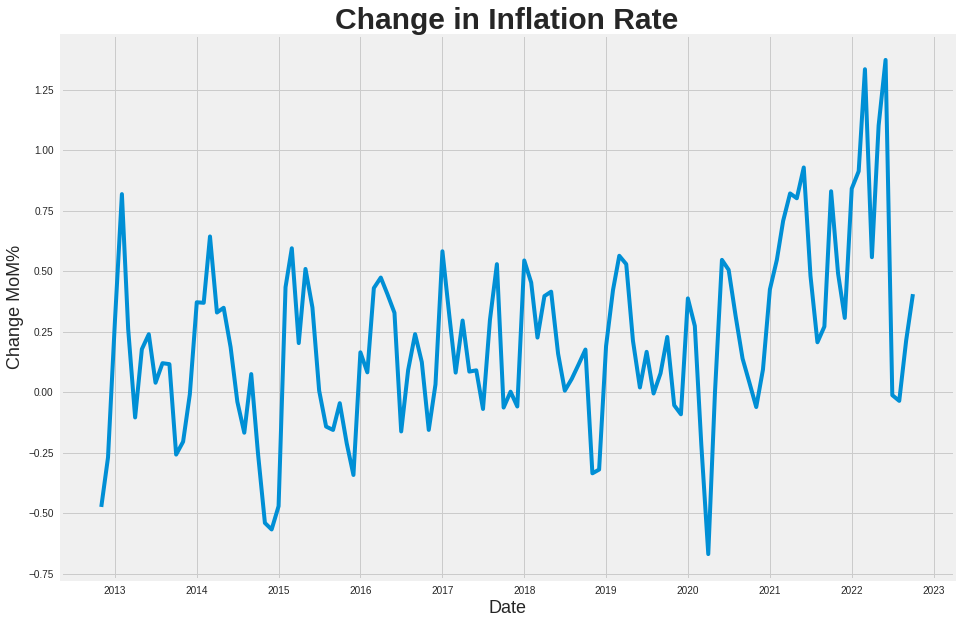

In [10]:
CPI_pct.index = pd.to_datetime(CPI_pct.index)

plt.figure(figsize=(16, 10)) 

plt.style.use('fivethirtyeight')

plt.plot(CPI_pct)

# Only Print Year 
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.title('Change in Inflation Rate', weight = 'bold', fontsize = 30)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Change MoM%', fontsize = 18)
plt.legend(loc='upper left')
plt.show()

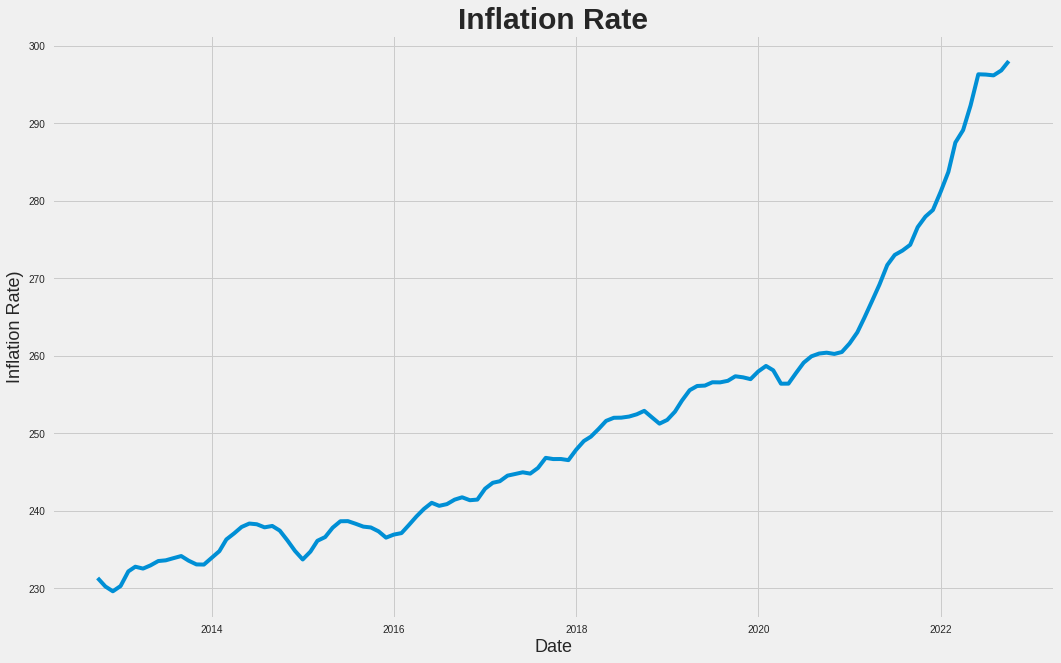

In [11]:
CPI.index = pd.to_datetime(CPI.index)

plt.figure(figsize=(16, 10)) 

plt.style.use('fivethirtyeight')

plt.plot(CPI)

# Only Print Year 
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.title('Inflation Rate', weight = 'bold', fontsize = 30)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Inflation Rate)', fontsize = 18)
plt.legend(loc='upper left')
plt.show()

In [12]:
result = pd.concat([SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit], axis=1)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10-31,325.40,550.02,472.65,1000.87,637.74,176.06,217.48,240.20
2012-11-01,329.30,554.75,477.31,998.78,638.86,175.87,217.35,241.00
2012-11-02,325.99,543.32,465.09,975.31,626.07,175.85,217.07,242.56


In [13]:
result.index = pd.to_datetime(result.index)
type(result.index)

pandas.core.indexes.datetimes.DatetimeIndex

**Adjusted Close Price of Assets**

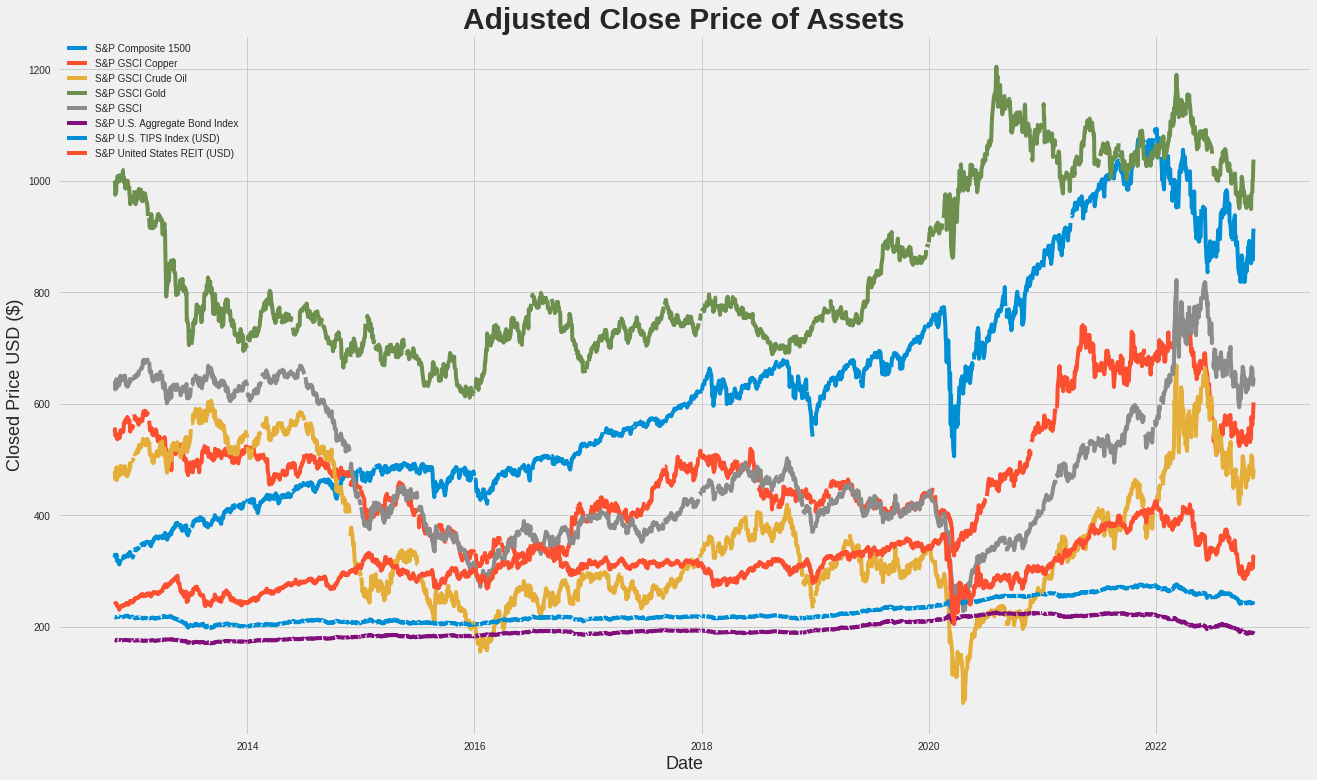

In [14]:
assets = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]

# Visualize the price history
plt.figure(figsize=(20, 12)) 

plt.style.use('fivethirtyeight')

# Loop through each stock and plot the Adj Close for each day
for item in assets:
    plt.plot(result[item],  label = item)

# Only Print Year 
date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.title('Adjusted Close Price of Assets', weight = 'bold', fontsize = 30)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closed Price USD ($)', fontsize = 18)
plt.legend(loc='upper left')
plt.show()

In [15]:
tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
           'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']
for ticker in tickers:
    result[ticker] = result[ticker].pct_change()

In [16]:
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01,0.011985,0.008600,0.009859,-0.002088,0.001756,-0.001079,-0.000598,0.003331
2012-11-02,-0.010052,-0.020604,-0.025602,-0.023499,-0.020020,-0.000114,-0.001288,0.006473


In [17]:
result = result.groupby(pd.Grouper(freq='M')).sum().reset_index()
result.head(3)

,Date,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
0,2012-10-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-11-30,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2,2012-12-31,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [18]:
result['Date'] = result['Date'].apply(lambda x: x.strftime('%Y-%m'))
result.set_index('Date', inplace = True)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [19]:
CPI_pct2.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [20]:
final_result = pd.concat([result, CPI_pct2['CPI']], axis=1)
final_result = final_result.iloc[1:, :]
final_result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),CPI
Date,,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363,-0.473809
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802,-0.269306
2013-01,0.051520,0.029344,0.060549,-0.007569,0.043848,-0.005389,-0.007649,0.034616,0.295730


In [21]:
final_result.shape

(121, 9)

In [22]:
corrDf = final_result.copy()

In [23]:
final_result.to_csv("DF Data.csv")

In [24]:
ret = final_result#.pct_change().dropna()
ret.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),CPI
Date,,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363,-0.473809
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802,-0.269306
2013-01,0.051520,0.029344,0.060549,-0.007569,0.043848,-0.005389,-0.007649,0.034616,0.295730
2013-02,0.011497,-0.043285,-0.056413,-0.051071,-0.040709,0.004699,0.002616,0.010951,0.819003
2013-03,0.036598,-0.034836,0.055649,0.011267,0.010851,0.001038,0.003078,0.024631,0.261451


In [25]:
ret.drop(columns = 'CPI', inplace = True)
ret_mean = ret.mean(axis = 1)
ret_mean.head()

Date
2012-11    0.011018
2012-12    0.004312
2013-01    0.024909
2013-02   -0.020215
2013-03    0.013534
dtype: float64

In [26]:
numAssets = len(ret.columns)
weights = [1/numAssets for i in range(numAssets)]
weights

[0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

In [27]:
ret["EWP"] = ret.dot(weights) #ret.mul(weights, axis = 'colunms').sum(axis = 1)
ret["EqWt"] = ret["EWP"].cumsum()

In [28]:
ret *= 100
ret.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),EWP,EqWt
Date,,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,1.101847,1.101847
2012-12,0.945836,-0.761000,3.336160,-2.120430,-0.495040,-0.123241,-0.513191,3.180230,0.431166,1.533013
2013-01,5.152027,2.934410,6.054883,-0.756875,4.384769,-0.538879,-0.764927,3.461645,2.490882,4.023894
2013-02,1.149651,-4.328523,-5.641346,-5.107124,-4.070926,0.469874,0.261607,1.095084,-2.021463,2.002431
2013-03,3.659816,-3.483619,5.564867,1.126700,1.085099,0.103780,0.307769,2.463102,1.353439,3.355871


In [29]:
tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
           'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']
for ticker in tickers:
    ret[ticker] = ret[ticker].cumsum()
ret.head(15)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),EWP,EqWt
Date,,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,1.101847,1.101847
2012-12,1.485129,2.272130,6.747958,-2.400468,1.545501,0.026127,-0.056252,2.643976,0.431166,1.533013
2013-01,6.637155,5.206540,12.802841,-3.157343,5.930270,-0.512752,-0.821179,6.105622,2.490882,4.023894
2013-02,7.786806,0.878017,7.161495,-8.264467,1.859344,-0.042878,-0.559572,7.200706,-2.021463,2.002431
2013-03,11.446622,-2.605602,12.726362,-7.137766,2.944443,0.060902,-0.251803,9.663808,1.353439,3.355871
2013-04,13.148053,-8.969232,9.028414,-14.504270,-1.720923,0.916383,0.431786,16.097008,-1.552468,1.803402
2013-05,15.334513,-5.015808,7.615635,-19.859300,-3.082953,-0.656571,-3.585844,9.823312,-1.731779,0.071623
2013-06,13.940897,-12.708880,12.627634,-32.441645,-3.681869,-2.089183,-7.471591,7.714576,-3.085381,-3.013758
2013-07,18.947686,-10.484792,21.199162,-25.168603,0.738579,-1.954635,-7.045168,8.636929,3.622403,0.608645


In [30]:
type(ret.index)

pandas.core.indexes.base.Index

In [31]:
ret.index = pd.to_datetime(ret.index)
type(ret.index)

pandas.core.indexes.datetimes.DatetimeIndex

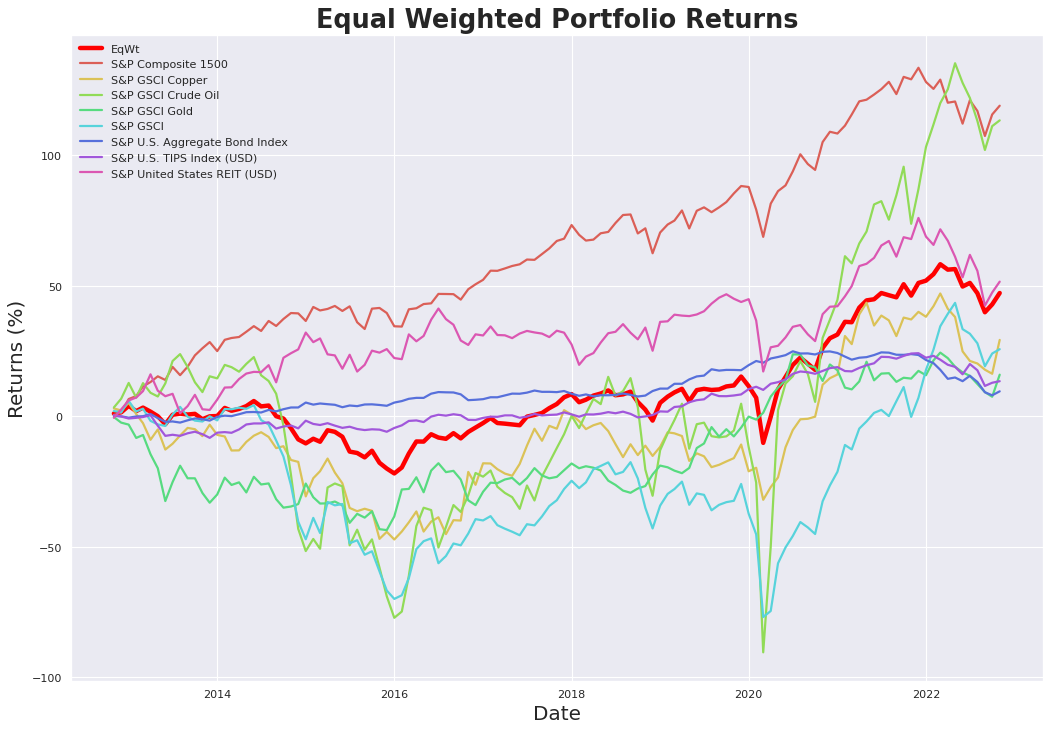

In [39]:
figure(figsize=(14, 10), dpi=80)

palette = sns.color_palette("hls", 8)
sns.set_palette(palette)
sns.set_style('darkgrid')
#plt.style.use('fivethirtyeight')

plt.plot(ret["EqWt"], label = 'EqWt', linewidth = 4, color = 'red')

vars = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]
for i in vars:
    plt.plot(ret.index, ret[i], label = i, linewidth = 2)

date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.legend()
plt.title("Equal Weighted Portfolio Returns", fontsize = 23, weight = 'bold')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Returns (%)', fontsize = 18)
plt.show()


In [33]:
# Export DF
#ret.to_csv('DF Equal Weight.csv')

In [34]:
corrDf.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),CPI
Date,,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363,-0.473809
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802,-0.269306
2013-01,0.051520,0.029344,0.060549,-0.007569,0.043848,-0.005389,-0.007649,0.034616,0.295730


In [35]:
cols = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]

correlation = []

for item in cols:
    correlation.append(corrDf['CPI'].corr(corrDf[item]))

correlation

[-0.05359519029658496,
 0.02689181680465091,
 0.2174787093314811,
 -0.02181196159662153,
 0.3281264087743513,
 -0.24468538628815123,
 -0.09178061712464133,
 -0.05215112688671251]

In [36]:
correlation = np.asarray(correlation)
type(correlation)

numpy.ndarray

In [40]:
corrData = pd.DataFrame(correlation, index = cols, columns = ['Correlation'])
corrData

,Correlation
S&P Composite 1500,-0.053595
S&P GSCI Copper,0.026892
S&P GSCI Crude Oil,0.217479
S&P GSCI Gold,-0.021812
S&P GSCI,0.328126
S&P U.S. Aggregate Bond Index,-0.244685
S&P U.S. TIPS Index (USD),-0.091781
S&P United States REIT (USD),-0.052151


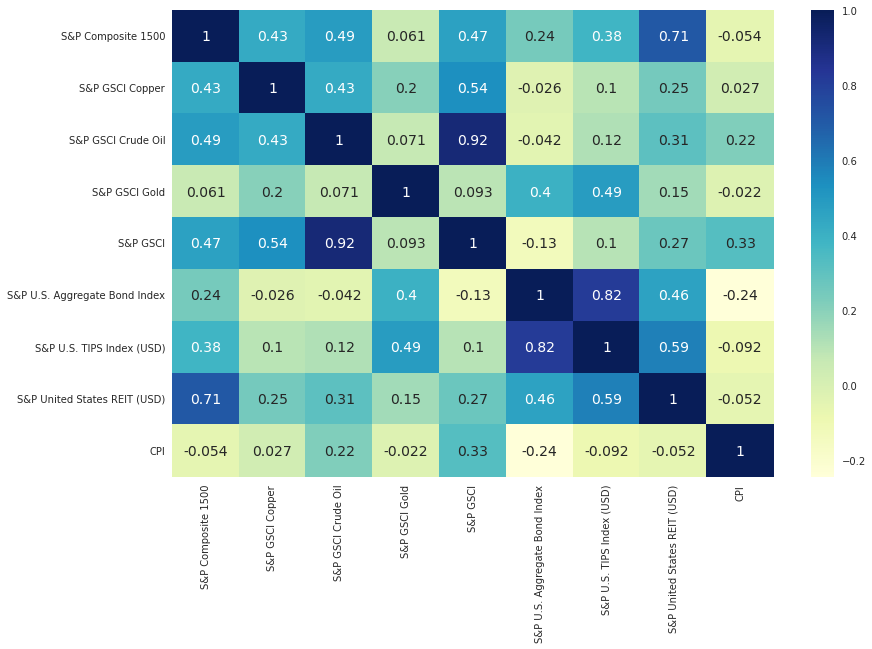

In [38]:
plt.figure(figsize = (12, 8))

title = "Assets and Inflation Correlation Heat Map"
#plt.title(title, fontsize=25, weight = 'bold')

sns.heatmap(corrDf.corr(), cmap="YlGnBu", annot=True)